The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [245]:
#reading the data
data_train = pd.read_csv('Train_UWu5bXk.csv')

In [246]:
#let's see a glimpse of the data
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [247]:
#getting some more information about the data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [248]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [249]:
#importing the test data
data_test = pd.read_csv('Test_u94Q5KV.csv')

In [250]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [251]:
data_train['Source'] = 'train'
data_test['Source'] = 'test'
data = pd.concat([data_train, data_test], ignore_index=True)

In [252]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [253]:
print('the shape of data train: {} \n the shape of train data: {} \n finaly the shape of combined data is: {} ' .format(data_train.shape, data_test.shape, data.shape))

the shape of data train: (8523, 13) 
 the shape of train data: (5681, 12) 
 finaly the shape of combined data is: (14204, 13) 


In [254]:
#checking the null values
data.isnull().sum()           

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Source                          0
dtype: int64

In [255]:
#this method is also used to check the null values
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Source                          0
dtype: int64

In [256]:
data.isnull().any()

Item_Fat_Content             False
Item_Identifier              False
Item_MRP                     False
Item_Outlet_Sales             True
Item_Type                    False
Item_Visibility              False
Item_Weight                   True
Outlet_Establishment_Year    False
Outlet_Identifier            False
Outlet_Location_Type         False
Outlet_Size                   True
Outlet_Type                  False
Source                       False
dtype: bool

In [257]:
data.isnull().any().any()

True

In [258]:
data.isnull().sum().sum()

12136

In [259]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
Source                           2
dtype: int64

In [260]:
#finding the categorical data
categorical_items = [x for x in data.dtypes.index if data.dtypes[x]=='object']

In [261]:
categorical_items

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'Source']

In [262]:
categorical_items = [x for x in categorical_items if x not in ['Item_Identifier','Outlet_Identifier', 'Source']]

In [263]:
categorical_items

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

In [264]:
#Print frequency of categories
for col in categorical_items:
    print ('\n the frequency of categories for variable {}'.format(col))
    print (data[col].value_counts())
    


 the frequency of categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

 the frequency of categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

 the frequency of categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

 the frequency of categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outl

In [265]:
#data cleaning
#dealing with null values

data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mean(), inplace = True)

In [266]:
data['Item_Outlet_Sales'].isnull().sum()

0

In [267]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [268]:
data['Item_Weight'].isnull().sum()

0

In [269]:
data['Item_Weight'].isnull().any()

False

In [270]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [271]:
# checking how many null values are available in Outlet_Size column
data['Outlet_Size'].isnull().sum()

4016

In [272]:
#chicking the frequency distribution of each record in the Outlet_Size column
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

as we can clearly see, the Medium size (4655) is the most frequent one.
we can use it to fill the null values of the Outlet_Size column

In [273]:
#filling the categorical null values of Outlet_Size column
# index[0] indicates the most frequent
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].value_counts().index[0])

In [274]:
#now, rechicking the existance of null values
data['Outlet_Size'].isnull().sum()

0

In [275]:
frequency_outletSize = data['Outlet_Size'].value_counts()

In [276]:
frequency_outletSize

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [277]:
frequency_outletSize.values

array([8671, 3980, 1553], dtype=int64)

In [278]:
frequency_outletSize.index

Index(['Medium', 'Small', 'High'], dtype='object')

Text(0.5,0,'Outlet_Size')

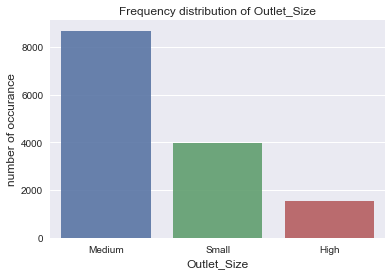

In [279]:
sns.barplot(x = frequency_outletSize.index, y= frequency_outletSize.values, alpha=0.9)
plt.title('Frequency distribution of Outlet_Size')
plt.ylabel('number of occurance', fontsize=12)
plt.xlabel('Outlet_Size', fontsize=12)

In [280]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,1076.412666
Supermarket Type1,2262.232963
Supermarket Type2,2069.766739
Supermarket Type3,3088.550567


In [281]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [282]:
visibility_avg.head()

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [283]:
#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

In [284]:
print('number of zeros initially %d' %sum(miss_bool))


number of zeros initially 879


In [285]:
#Determine the years of operation of a store
#We wanted to make a new column depicting the years of operation of a store. This can be done as:

data['Outlet_year'] = 2019 - data['Outlet_Establishment_Year']

In [286]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,Outlet_year
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,20
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,10
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,20
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,21
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,32


In [287]:
data['Outlet_year'].describe()

count    14204.000000
mean        21.169319
std          8.371664
min         10.000000
25%         15.000000
50%         20.000000
75%         32.000000
max         34.000000
Name: Outlet_year, dtype: float64

This shows stores which are 10-34 years old.

In [288]:
#Modify categories of Item_Fat_Content
#We found typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:

print ("the original categories: \n")
data['Item_Fat_Content'].value_counts()

the original categories: 



Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [289]:
print (" \n modified categories \n")
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Reg'})
data['Item_Fat_Content'].value_counts()

 
 modified categories 



Low Fat    9185
Regular    4824
Reg         195
Name: Item_Fat_Content, dtype: int64

In [290]:
# Numerical and One-Hot Coding of Categorical variables
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
#new label for outil
data['Outlet'] = label.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [291]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,Outlet_year,Outlet
0,0,FDA15,249.8092,3735.1380,4,0.016047,9.30,1999,OUT049,0,1,1,train,20,9
1,2,DRC01,48.2692,443.4228,14,0.019278,5.92,2009,OUT018,2,1,2,train,10,3
2,0,FDN15,141.6180,2097.2700,10,0.016760,17.50,1999,OUT049,0,1,1,train,20,9
3,2,FDX07,182.0950,732.3800,6,0.000000,19.20,1998,OUT010,2,1,0,train,21,0
4,0,NCD19,53.8614,994.7052,9,0.000000,8.93,1987,OUT013,2,0,1,train,32,1


In [292]:
# onehot encoding

data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type','Outlet'] )

In [293]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Source,Outlet_year,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,1999,OUT049,train,20,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,2009,OUT018,train,10,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,1999,OUT049,train,20,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.000000,19.20,1998,OUT010,train,21,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.000000,8.93,1987,OUT013,train,32,1,...,0,1,0,0,0,0,0,0,0,0


Here we can see that all variables are now float and each category has a new variable. 
Lets look at the 3 columns formed from Item_Fat_Content.

In [294]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [295]:
#Spliting data back to train and test 

#Drop the columns which have been converted to different types:
train = data.loc[data['Source'] == 'train']
test = data.loc[data['Source'] == 'test']


In [296]:
data.drop(columns=['Source', 'Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)

In [297]:
data.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,3735.1380,0.016047,9.30,1999,20,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,443.4228,0.019278,5.92,2009,10,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,2097.2700,0.016760,17.50,1999,20,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,732.3800,0.000000,19.20,1998,21,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,994.7052,0.000000,8.93,1987,32,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [298]:
y = data['Item_Outlet_Sales']
x = data.drop(columns=['Item_Outlet_Sales'], axis=1)

In [299]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state = 0)

In [300]:
x_train.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
7976,228.2036,0.080073,5.035000,2002,17,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
12641,156.5288,0.178330,18.100000,2002,17,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7901,166.6474,0.157076,11.600000,1999,20,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2009,222.3772,0.106539,12.792854,1985,34,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
13606,169.3474,0.019490,9.000000,1987,32,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [301]:
x_test.describe()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,...,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000,4262.000000
mean,141.918779,0.066440,12.779384,1997.881980,21.118020,0.641483,0.014547,0.343970,0.281793,0.329188,...,0.064758,0.109573,0.111685,0.107461,0.061708,0.107227,0.109573,0.107931,0.106523,0.113562
std,62.565760,0.052513,4.242097,8.351743,8.351743,0.479621,0.119745,0.475087,0.449926,0.469974,...,0.246128,0.312393,0.315015,0.309735,0.240653,0.309437,0.312393,0.310329,0.308542,0.317315
min,32.055800,0.000000,4.555000,1985.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.710050,0.026926,9.300000,1987.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,143.662800,0.053799,12.792854,1999.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,186.716100,0.095154,16.000000,2004.000000,32.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,266.888400,0.325781,21.350000,2009.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [302]:
#creating our model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Model Evaluation¶

Let's evaluate the model by checking out it's coefficients and how we can interpret them.


In [303]:
print(model.intercept_)

4.7512858243156696e+16


In [304]:
print(model.coef_)

[ 9.21502849e+00 -3.06617503e+02 -3.36405700e+00 -2.35328648e+13
 -2.35129787e+13 -6.57727507e+11 -6.57727507e+11 -6.57727507e+11
 -1.93373680e+11 -1.57291203e+11  1.11727647e+12 -1.79204945e+11
  1.03135258e+12  4.48422432e+11 -3.66035439e+11 -3.66035439e+11
 -3.66035439e+11 -3.66035439e+11 -3.66035439e+11 -3.66035439e+11
 -3.66035439e+11 -3.66035439e+11 -3.66035439e+11 -3.66035439e+11
 -3.66035439e+11 -3.66035439e+11 -3.66035439e+11 -3.66035439e+11
 -3.66035439e+11 -3.66035439e+11 -7.04945931e+11 -2.32461253e+11
 -6.64335815e+11 -9.02577827e+11 -8.41689749e+11 -3.22364575e+11
  1.39368614e+11 -6.63552193e+11  7.93370570e+11 -9.02577827e+11
  6.62640303e+11  3.99378538e+10  5.59519716e+11  1.63618753e+10]


In [305]:
md_coeff = pd.DataFrame(model.coef_, index=x_train.columns, columns=['Coefficent'])

In [306]:
md_coeff

,Coefficent
Item_MRP,9.215028e+00
Item_Visibility,-3.066175e+02
Item_Weight,-3.364057e+00
Outlet_Establishment_Year,-2.353286e+13
Outlet_year,-2.351298e+13
Item_Fat_Content_0,-6.577275e+11
Item_Fat_Content_1,-6.577275e+11
Item_Fat_Content_2,-6.577275e+11
Outlet_Location_Type_0,-1.933737e+11
Outlet_Location_Type_1,-1.572912e+11


Predictions from our Model¶

Let's grab predictions off our test set and see how well it did!


In [307]:
y_pred = model.predict(x_test)

In [308]:
y_pred

array([2928., 1968., 2072., ..., 1200.,   96., 2424.])

evaluating the performance of the model

In [309]:
from sklearn import metrics 
metrics.r2_score(y_test, y_pred)

0.33955669162554325

In [310]:
metrics.explained_variance_score(y_test, y_pred)

0.34058894679433793

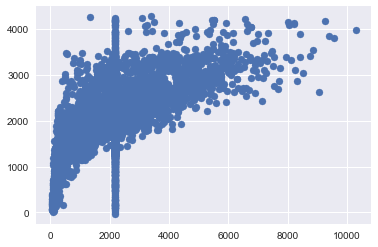

In [311]:
plt.scatter(y_test, y_pred)

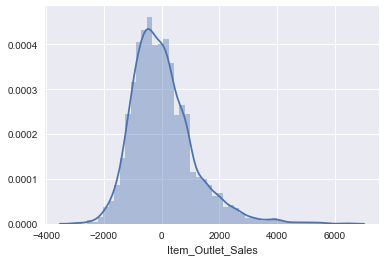

In [312]:
sns.distplot(y_test - y_pred, bins=50)

### Evaluation Metrics
Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [313]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  810.8317857163544
MSE:  1187467.7127054345
RMSE:  1089.7099213577137


In [326]:
# evaluating the model
print("MAE: " , metrics.mean_absolute_error(y_test,y_prediction))
print("MSE: ", metrics.mean_squared_error(y_test, y_prediction))
print("SMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

MAE:  810.8317857163544
MSE:  1187467.7127054345
SMSE:  1089.7099213577137
